<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/xgboost_catboost_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика
# xgboost, catboost(yandex), lightbm

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error

# ШАГ 1
## Генерация данных

In [ ]:
n_train = 500
n_test = 1000
noise = 0.15

In [ ]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) +\
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

In [ ]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

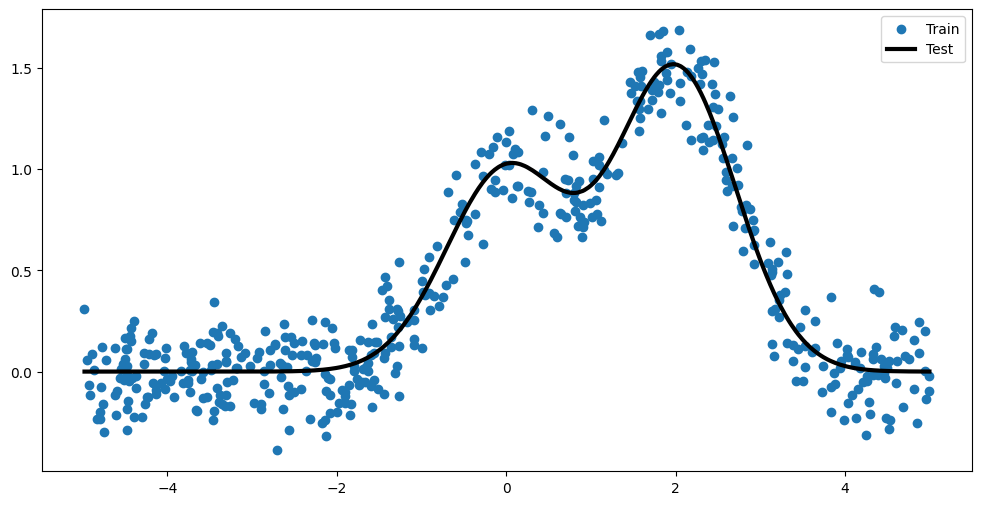

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Train')
plt.plot(X_test, f(X_test), c='black', linewidth=3, label='Test')
plt.legend();

## Обучение решающего дерева
- Обучите библиотечное решающее дерево на сгенерированных выше данных
- Постройте вектор предсказаний для тестовых данных
- Визуализируйте тестовые данные, обучающие данные и предсказания на одном графике, выведите среднеквадратичную ошибку

In [ ]:
tree_2 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
tree_5 = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
tree_10 = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)

y_pred_2 = tree_2.predict(X_test)
y_pred_5 = tree_5.predict(X_test)
y_pred_10 = tree_10.predict(X_test)

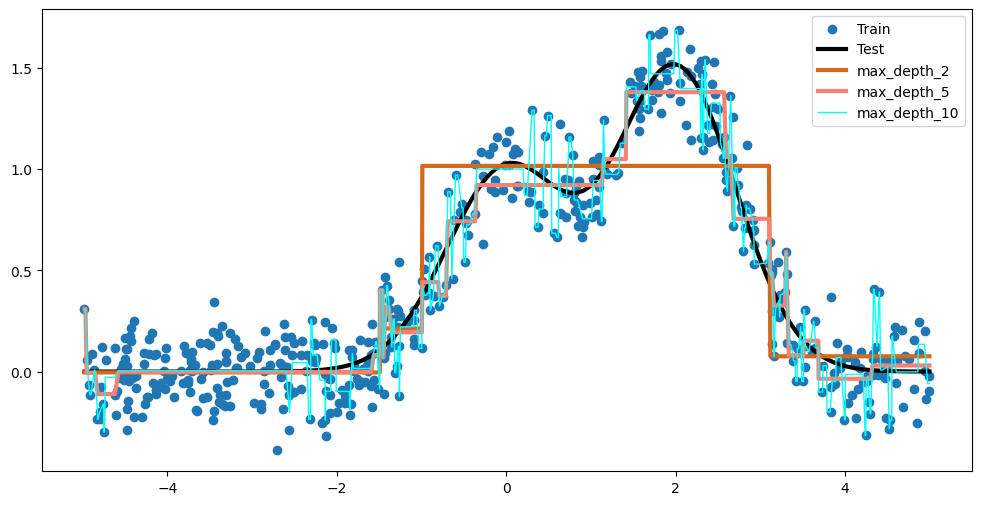

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(X_train, y_train, label='Train')
plt.plot(X_test, f(X_test), c='black', linewidth=3, label='Test')

plt.plot(X_test, y_pred_2, c='chocolate', linewidth=3, label='max_depth_2')
plt.plot(X_test, y_pred_5, c='salmon', linewidth=3, label='max_depth_5')
plt.plot(X_test, y_pred_10, c='cyan', linewidth=1, label='max_depth_10')
plt.legend();

## Градиентный бустинг
- Повторите предыдущее задание для градиентного бустинга
- Проинтерпретируйте результаты обоих шагов

In [ ]:
tree_1 = GradientBoostingRegressor(learning_rate=1).fit(X_train, y_train)
tree_2 = GradientBoostingRegressor(learning_rate=0.5).fit(X_train, y_train)
tree_3 = GradientBoostingRegressor(learning_rate=0.1).fit(X_train, y_train)

y_pred_1 = tree_1.predict(X_test)
y_pred_2 = tree_2.predict(X_test)
y_pred_3 = tree_3.predict(X_test)

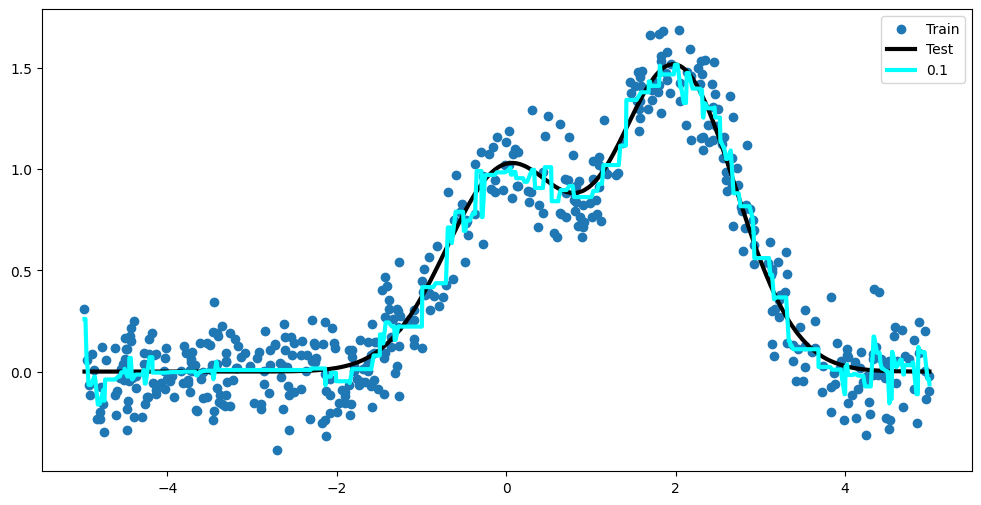

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(X_train, y_train, label='Train')
plt.plot(X_test, f(X_test), c='black', linewidth=3, label='Test')

#plt.plot(X_test, y_pred_1, c='chocolate', linewidth=3, label='1')
#plt.plot(X_test, y_pred_2, c='salmon', linewidth=3, label='0.5')
plt.plot(X_test, y_pred_3, c='cyan', linewidth=3, label='0.1')
plt.legend();

# ШАГ 2
## Загрузка данных для практики

In [ ]:
df = pd.read_csv('stars.csv').drop(columns=['obj_ID'])
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
y = df['class']
X = df.drop(columns=['class'])

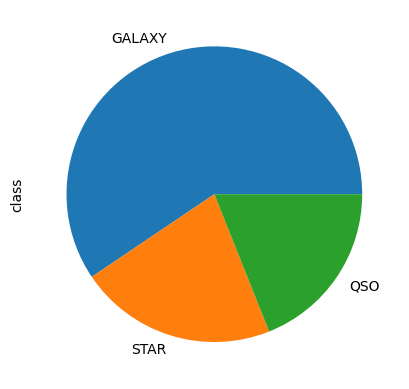

In [ ]:
y.value_counts().plot(kind='pie');

## Оптимальный бустинг
Используя решетчатый поиск, найдите оптимальные значения параметров :
- Решающего дерева (максимальная глубина),
- Xgboost (количества деревьев и максимально глубины дерева),
- AdaBoost и
- Light Gradient Boosted Machine **LightGBM**

In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import catboost as cat
import lightgbm as light

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_xgb = y.replace('STAR', 0).replace('GALAXY', 1).replace('QSO', 2)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_xgb, test_size=0.33, random_state=42)

In [ ]:
gb = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gb.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.9718037704594428

In [ ]:
lgbm = light.LGBMClassifier().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
f1_score(y_test, y_pred, average='macro')

In [ ]:
xg = xgb.XGBClassifier().fit(X_train_xgb, y_train_xgb)
y_pred = xg.predict(X_test_xgb)
f1_score(y_test_xgb, y_pred, average='macro')

0.972403853463629

In [ ]:
ct = cat.CatBoostClassifier().fit(X_train, y_train)
y_pred = ct.predict(X_test)
f1_score(y_test, y_pred, average='macro')

# ШАГ 3
## Учимся работать с бустингами


Фишки lightgbm

In [ ]:
# light.cv, light.early_stopping, light.plot_importance, light.plot_tree

In [ ]:
light.plot_importance(lgbm);

In [ ]:
light.plot_tree(lgbm, figsize=(16, 12), tree_index=0);

In [ ]:
light.plot_tree(lgbm, figsize=(16, 12), tree_index=99);

Фишки xgb

In [ ]:
# xg.save_model, xg.load_model, xgb.DMatrix, xgb.cv, xgb.plot_importance, xgb.plot_tree

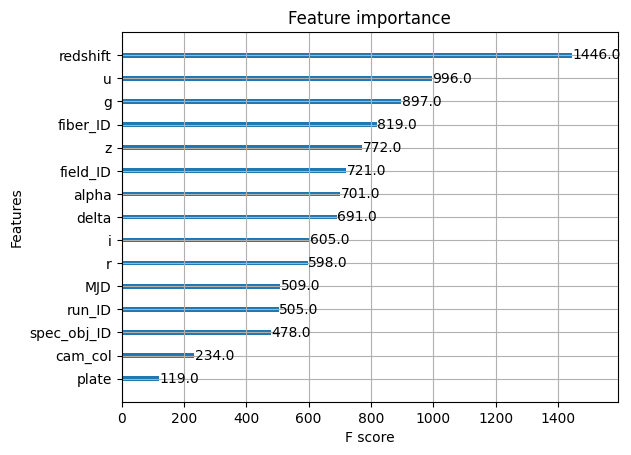

In [ ]:
xgb.plot_importance(xg);

Фишки catboost

In [ ]:
# ct.drop_unused_features, ct.evals_result_, cat.load_model, cat.save_model, cat.cv, ct.plot_tree, cat.Pool

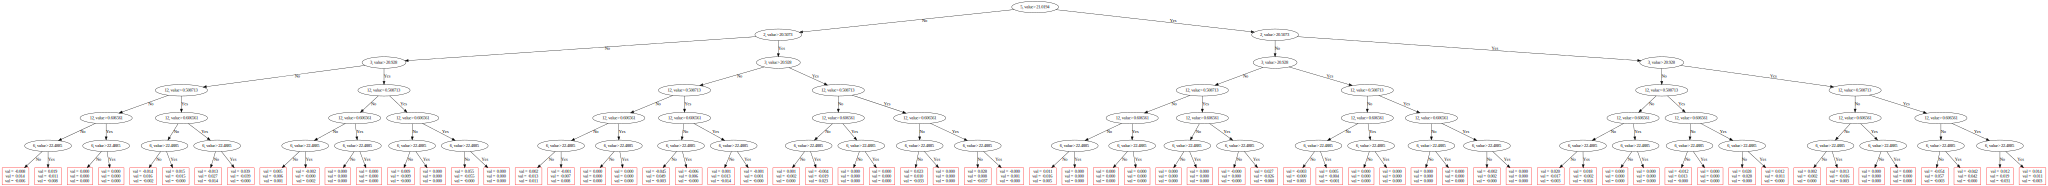

In [ ]:
ct.plot_tree(111)

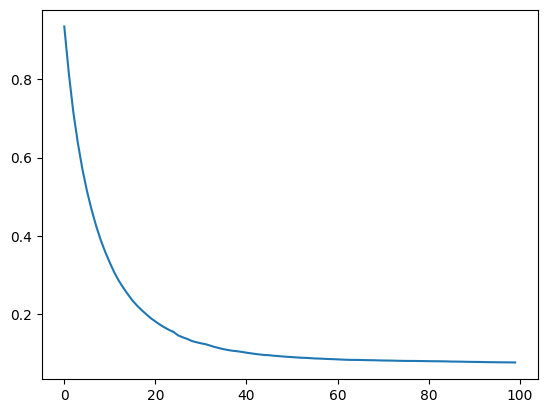

In [ ]:
plt.plot(ct.get_evals_result()['learn']['MultiClass'][:100]);

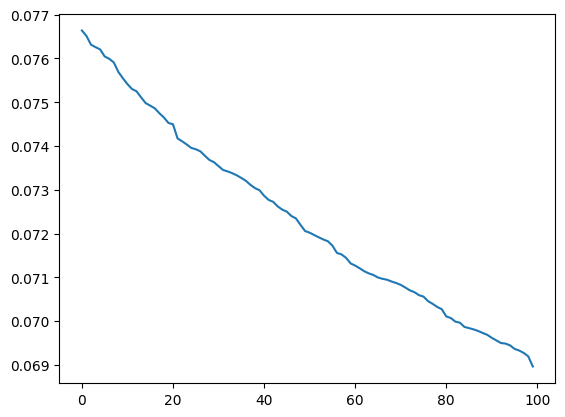

In [ ]:
plt.plot(ct.get_evals_result()['learn']['MultiClass'][100:200]);

In [ ]:
from catboost import Pool, cv

cv_dataset = Pool(data=X, label=y)

labels = [1, 1, 0, 0, 0, 1]

params = {"iterations": 100,
          "loss_function": "MultiClassOneVsAll",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=4,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/4]

bestTest = 0.08736092001
bestIteration = 99

Training on fold [1/4]

bestTest = 0.08694914926
bestIteration = 99

Training on fold [2/4]

bestTest = 0.09010093768
bestIteration = 99

Training on fold [3/4]

bestTest = 0.08688964822
bestIteration = 99



In [ ]:
scores

,iterations,test-MultiClassOneVsAll-mean,test-MultiClassOneVsAll-std,train-MultiClassOneVsAll-mean,train-MultiClassOneVsAll-std
0,0,0.666880,0.000034,0.666873,0.000020
1,1,0.642690,0.000135,0.642675,0.000107
2,2,0.618893,0.000148,0.618873,0.000101
3,3,0.596881,0.000215,0.596855,0.000134
4,4,0.576047,0.000214,0.576017,0.000119
...,...,...,...,...,...
95,95,0.091390,0.001582,0.090937,0.000291
96,96,0.090415,0.001496,0.089975,0.000293
97,97,0.089564,0.001554,0.089131,0.000264
98,98,0.088659,0.001479,0.088230,0.000251


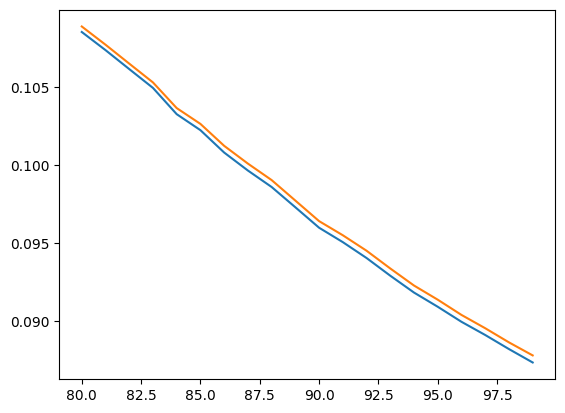

In [ ]:
plt.plot(scores['train-MultiClassOneVsAll-mean'][80:])
plt.plot(scores['test-MultiClassOneVsAll-mean'][80:]);

#  ШАГ 4
## Настройка параметров XGBoost
- настройте идеальное количество деревьев при высоком шаге обучения
- оптимизируйте парметры деревьев
- оптимизируйте гиперпараметры бустинга

In [ ]:
grid = {
    'n_estimators' : [100, 150, 200],
    #'learning_rate': [0.1, 0.2, 0.5],
    #'max_depth': [],
    #'leaves_count': [],
    #'colsample': [],
    #'subsample': [],
    #'reg_alpha': [],
    #'reg_lambda': []
}
lgbm = light.LGBMClassifier()
gs = GridSearchCV(lgbm, grid, n_jobs = -1, cv = 3)
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_, gs.best_params_

(0.9790746346530691, {'n_estimators': 200})

In [ ]:
grid = {
    'n_estimators' : [200],
    'learning_rate': [0.1, 0.2, 0.5],
    #'max_depth': [],
    #'leaves_count': [],
    #'colsample': [],
    #'subsample': [],
    #'reg_alpha': [],
    #'reg_lambda': []
}
lgbm = light.LGBMClassifier()
gs = GridSearchCV(lgbm, grid, n_jobs = -1, cv = 3)
gs.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3549
[LightGBM] [Info] Number of data points in the train set: 67000, number of used features: 15
[LightGBM] [Info] Start training from score -0.520323
[LightGBM] [Info] Start training from score -1.665061
[LightGBM] [Info] Start training from score -1.530199


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'n_estimators': [200]})

In [ ]:
gs.best_score_, gs.best_params_

(0.9790746346530691, {'learning_rate': 0.1, 'n_estimators': 200})